<a href="https://colab.research.google.com/github/H2IA/escola-de-verao-2021/blob/main/Introdu%C3%A7%C3%A3o_%C3%A0s_redes_neurais_com_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução às redes neurais com PyTorch

O PyTorch é um *framework* para *deep learning* desenvolvido para linguagem Python baseado no Torch, originalmente implementando em linguagem Lua. De modo similar do TensorFlow, o PyTorch permite a criação de redes neurais profundas tanto de forma **declarativa** (útil para usuários iniciantes) quanto **imperativa** (útil para usuários mais avançados).

## Tensores

As operações realizadas pelo PyTorch devem utilizar a classe `torch.tensor` como base, que fornece uma interface similar à classe `numpy.array`. É possível criar um novo objeto de tensor a partir de listas em *arrays* do `numpy` de forma simples:

In [1]:
import torch
import numpy as np

In [2]:
data = [[1,2], [3,4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [3]:
data_array = np.array(data)
x_data = torch.from_numpy(data_array)
x_data

tensor([[1, 2],
        [3, 4]])

*Slicing* de tensores usando a sintaxe do numpy.

In [4]:
data_array[:, 1] 

array([2, 4])

Operações com tensores são "*element-wise*"


In [5]:
data_array * 1000

array([[1000, 2000],
       [3000, 4000]])

Também podemos criar tensores com "forma" (*shape*) pré-definida contendo valores fixos (ex: 0 ou 1) ou aleatórios.

In [6]:
shape = (3,2,1)

x_data_random = torch.rand(shape)
print('random:', x_data_random)

x_data_ones   = torch.ones(shape)
print('ones:', x_data_ones)

x_data_zeros  = torch.zeros(shape)
print('zeros:', x_data_zeros)

random: tensor([[[0.0319],
         [0.0939]],

        [[0.4218],
         [0.8767]],

        [[0.9772],
         [0.5168]]])
ones: tensor([[[1.],
         [1.]],

        [[1.],
         [1.]],

        [[1.],
         [1.]]])
zeros: tensor([[[0.],
         [0.]],

        [[0.],
         [0.]],

        [[0.],
         [0.]]])


Um grande diferencial dos tensores do `pytorch` em relação aos arrays do `numpy` é a sua afinidade com unidades de processamento (ex: CPU, GPU).

In [7]:
print('tensor shape:             ', x_data.shape)
print('tensor data type (dtype): ', x_data.dtype)
print('tensor device           : ', x_data.device)

tensor shape:              torch.Size([2, 2])
tensor data type (dtype):  torch.int64
tensor device           :  cpu


In [8]:
if torch.cuda.is_available():
  x_data_random = x_data_random.to('cuda')

print('tensor device           : ', x_data_random.device)

tensor device           :  cuda:0


In [9]:
if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'

## Obtendo o *dataset*

Para exemplificar o uso do PyTorch na criação de redes neurais vamos retoma o exemplo do dataset de dígitos escritos à mão.

In [10]:
from sklearn.datasets import load_digits
import pandas as pd

In [11]:
data = load_digits()

In [12]:
X, y = data['data'], data['target']

In [13]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [14]:
import matplotlib.pyplot as plt

def plot_digit(digit):
  plt.figure(1, figsize=(3, 3))
  plt.imshow(digit.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
  plt.show()

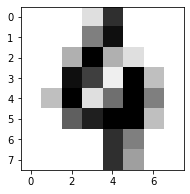

label: 4


In [15]:
plot_digit(X[100])
print('label:', y[100])

Para treinarmos um modelo com classificação multi-classe é importante garantir que todas as classes sejam representadas na mesma proporção.

In [16]:
for value in set(y):
  print(value, ':', list(y).count(value))

0 : 178
1 : 182
2 : 177
3 : 183
4 : 181
5 : 182
6 : 181
7 : 179
8 : 174
9 : 180


Como a ocorrência é cada classe é um pouco diferente, podemos realizar um *undersampling* das classes maiores e deixar todas com a mesma contagem de exemplos.

In [17]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

X_rus, y_rus = rus.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [18]:
for value in set(y_rus):
  print(value, ':', list(y_rus).count(value))

0 : 174
1 : 174
2 : 174
3 : 174
4 : 174
5 : 174
6 : 174
7 : 174
8 : 174
9 : 174


Agora vamos segmentar nosso *dataset* em uma fração de treino e outra de teste (ou validação).

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus)

Quando trabalhamos com redes neurais é uma boa prática se realizar o ajuste dos valores de entrada para estes estejam em um mesmo intervalo e (preferencialmente) entre 0 e 1 ou -1 e 1. Dados com amplitudes maiores podem dificultar o processo de amprendizagem. 

**Nota:** o processo de ajuste de escala e / ou normalização deve ser realizado APÓS a separação dos dados de treino dos dados de teste.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [21]:
X_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  2., 15., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ..., 10.,  0.,  0.],
       [ 0.,  2., 10., ...,  9.,  0.,  0.],
       [ 0.,  0.,  4., ...,  5.,  0.,  0.]])

In [22]:
X_train_scaled

array([[ 0.        , -0.32453173, -1.08048772, ..., -1.12749579,
        -0.50180943, -0.19151138],
       [ 0.        , -0.32453173, -1.08048772, ..., -1.12749579,
        -0.50180943, -0.19151138],
       [ 0.        ,  1.92222637,  2.12657022, ..., -1.12749579,
        -0.50180943, -0.19151138],
       ...,
       [ 0.        , -0.32453173, -0.01146841, ...,  0.56064327,
        -0.50180943, -0.19151138],
       [ 0.        ,  1.92222637,  1.05755091, ...,  0.39182936,
        -0.50180943, -0.19151138],
       [ 0.        , -0.32453173, -0.22527227, ..., -0.28342626,
        -0.50180943, -0.19151138]])

## Criando uma rede neural com o PyTorch

Agora podemos criar uma rede neural usando como base a classe `torch.nn.Module`. Para isso definimos cada camada em um atributo de classe no método construtor (`__init__`), para serem iniciadas quando esta forma instanciada, e depois definimos as conexões entre elas no método `forward`.

In [23]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):

    def __init__(self):
      super(Net, self).__init__()
      self.fc1 = nn.Linear(64, 32)
      self.fc2 = nn.Linear(32, 10)

    def forward(self, x):
      x = self.fc1(x)
      x = F.relu(x)
      x = self.fc2(x)
      return F.softmax(x)

model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

Agora definimos os nossos ciclos de treinamento, chamados "épocas" (`epochs`). Cada época consiste em uma leitura completa do *dataset* e inclui o ajuste dos pesos pelo nosso otimizador. É possível também se dividir uma época em passos (*steps*), onde os pesos serão ajustados com base em segmentos do *dataset* denominados *mini-batches*.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


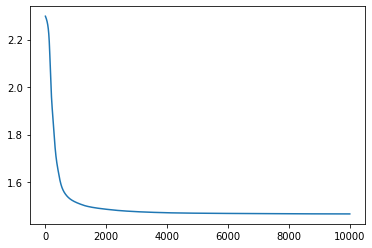

In [24]:
loss_history = []

for epoch in range(10000):

    optimizer.zero_grad()

    inputs = torch.from_numpy(X_train_scaled).float().to(device)
    labels = torch.from_numpy(y_train).to(device)

    outputs = model(inputs).to(device)
    loss = criterion(outputs, labels)
    loss.backward()

    optimizer.step()

    loss_history.append(loss.item())

plt.plot(loss_history)

Agora podemos avaliar o nosso modelo com base nos dados de teste. Primeiro vamos avaliar a acurácia "global" do modelo usando a função `accuracy_score` do módulo `sklearn.metrics`.

In [25]:
from sklearn.metrics import accuracy_score

with torch.no_grad():

  inputs = torch.from_numpy(X_test_scaled).float().to(device)
  outputs = model(inputs).to(device)
  y_pred  = np.argmax(outputs.cpu().data.numpy(), axis=1)

accuracy_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


0.9793103448275862

Agora vamos criar uma "matriz de confusão" usando a função `confusion_matrix` do mesmo módulo.

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[46,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 47,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0, 45,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 41,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 34]])

Por fim, vamos utilizar o `classification_report` para entender melhor qual a precisão e o *recall* do nosso modelo para cada classe. Estas informações ficam implícitas na matriz de confusão, mas sempre é bom ter elas de uma forma mais direta.

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        46
           1     0.9773    1.0000    0.9885        43
           2     0.9815    1.0000    0.9907        53
           3     0.9592    0.9592    0.9592        49
           4     1.0000    0.9722    0.9859        36
           5     0.9783    0.9184    0.9474        49
           6     1.0000    1.0000    1.0000        41
           7     0.9762    1.0000    0.9880        41
           8     0.9762    0.9762    0.9762        42
           9     0.9444    0.9714    0.9577        35

    accuracy                         0.9793       435
   macro avg     0.9793    0.9797    0.9794       435
weighted avg     0.9794    0.9793    0.9792       435



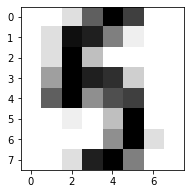

real label:      5
predicted label: 5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


In [28]:
example = 210

X_test_example = X_test[example]
plot_digit(X_test_example)

X_test_example_tensor = torch.from_numpy(X_test_example).float()
output = model(X_test_example_tensor.to(device)).cpu()
y_test_example = y_test[example]
y_pred_example = np.argmax(output.data.numpy())

print('real label:     ', y_test_example)
print('predicted label:', y_pred_example)